In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib


from sklearn.pipeline import Pipeline

from ai_essay_prediction_misha.pipeline import classes, abstract_classes, entities_data


In [2]:
df_pop = pd.read_csv("./out-after-filter-essayaiprediction/df_after_filtering.csv")
df_pop

,text,generated,source
0,\n\nTitle: A Revolutionary Transformation in M...,1.0,intel_neural_chat_7b
1,"\n\nFor some people, being labeled as extraord...",1.0,intel_neural_chat_7b
2,"\n\nTo begin, it's important to understand how...",1.0,intel_neural_chat_7b
3,\n\nIntroduction: Surfing has been largely ass...,1.0,intel_neural_chat_7b
4,\n\n\n\nIntroduction: The Concept of Driverles...,1.0,intel_neural_chat_7b
...,...,...,...
29120,Title: The Benefits of Limiting Car Usage: A M...,1.0,gpt_4_turbo
29121,The Electoral College is a unique system of el...,1.0,generated_by_misha_with_gpt_3_and_4
29122,Limiting car usage can have several advantages...,1.0,generated_by_misha_with_gpt_3_and_4
29123,"Dear Senator,\nI am writing to express my view...",1.0,generated_by_misha_with_gpt_3_and_4


In [3]:
df_sam = df_pop.sample(1000)

In [4]:
every_letters_cols_set = set()
the_most_popular_letter_features = set()

pipe_l = [
    ('lower_text', classes.LowerText('text', 'lower_text')),
    ('count_amount_letters', classes.CountAmountLettersInText('lower_text', 'n_letters')),
    ('count_every_letter', classes.CountAmountEveryLetterInText('lower_text', every_letters_cols_set)),
    ('remove_less_popular_features', classes.RemoveLessPopularFeatures(every_letters_cols_set, 0.2, the_most_popular_letter_features)),
    ('dividing_matrix_into_vector', classes.DivideMatrixIntoVector(the_most_popular_letter_features, 'n_letters', the_most_popular_letter_features)),

    ('dropper_columns', classes.DropperColumns({'text', 'source', 'lower_text', 'n_letters'}))
]

pipe = Pipeline(pipe_l)
pipe

Pipeline(steps=[('lower_text',
                 LowerText(_column_out='lower_text', _column_text='text')),
                ('count_amount_letters',
                 CountAmountLettersInText(_column_out='n_letters',
                                          _column_text='lower_text')),
                ('count_every_letter',
                 CountAmountEveryLetterInText(_column_text='lower_text',
                                              _columns_out=set())),
                ('remove_less_popular_features',
                 RemoveLessPopularFeatures(_Remov...
                                           _RemoveLessPopularFeatures__columns_stayed=set())),
                ('dividing_matrix_into_vector',
                 DivideMatrixIntoVector(_DivideMatrixIntoVector__column_divides='n_letters',
                                        _DivideMatrixIntoVector__columns_divided=set(),
                                        _DivideMatrixIntoVector__columns_out=set())),
                ('dropper_columns',
                 DropperColumns(_DropperColumns__columns_to_drop={'lower_text',
                                                                  'n_letters',
                                                                  'source',
                                                                  'text'}))])

In [5]:
X = df_sam.drop(columns='generated')
y = df_sam['generated']

X = pipe.fit_transform(X)

LowerText(_column_out='lower_text', _column_text='text')

0.011516094207763672 - spent time


,text,source,lower_text
5212,"In his famous poem “Harlem,” Langston Hughes r...",human_essays_by_misha,"in his famous poem “harlem,” langston hughes r..."
6178,Centuries of research have brought attempts to...,human_essays_by_misha,centuries of research have brought attempts to...
6355,"Utilitarianism, as characterized, is the oppos...",human_essays_by_misha,"utilitarianism, as characterized, is the oppos..."


CountAmountLettersInText(_column_out='n_letters', _column_text='lower_text')

0.0019986629486083984 - spent time


,text,source,lower_text,n_letters
5212,"In his famous poem “Harlem,” Langston Hughes r...",human_essays_by_misha,"in his famous poem “harlem,” langston hughes r...",14195
6178,Centuries of research have brought attempts to...,human_essays_by_misha,centuries of research have brought attempts to...,5909
6355,"Utilitarianism, as characterized, is the oppos...",human_essays_by_misha,"utilitarianism, as characterized, is the oppos...",7120


CountAmountEveryLetterInText(_column_text='lower_text',
                             _columns_out={'\n', '\r', ' ', '!', '"', '#', '$',
                                           '%', '&', "'", '(', ')', '*', '+',
                                           ',', '-', '.', '/', '0', '1', '2',
                                           '3', '4', '5', '6', '7', '8', '9',
                                           ':', ';', ...})

0.6990327835083008 - spent time


,text,source,lower_text,n_letters,w,🤢,?,],y,á,...,³,l,d,z,:,r,|,😕,🤦,س
5212,"In his famous poem “Harlem,” Langston Hughes r...",human_essays_by_misha,"in his famous poem “harlem,” langston hughes r...",14195,135.0,0.0,5.0,8.0,167.0,0.0,...,0.0,416.0,376.0,8.0,3.0,691.0,0.0,0.0,0.0,0.0
6178,Centuries of research have brought attempts to...,human_essays_by_misha,centuries of research have brought attempts to...,5909,61.0,0.0,1.0,0.0,60.0,0.0,...,0.0,223.0,144.0,0.0,2.0,295.0,0.0,0.0,0.0,0.0
6355,"Utilitarianism, as characterized, is the oppos...",human_essays_by_misha,"utilitarianism, as characterized, is the oppos...",7120,56.0,0.0,1.0,0.0,103.0,0.0,...,0.0,206.0,211.0,10.0,1.0,321.0,0.0,0.0,0.0,0.0


RemoveLessPopularFeatures(_RemoveLessPopularFeatures__border=0.2,
                          _RemoveLessPopularFeatures__columns=('w', '🤢', '?',
                                                               ']', 'y', 'á',
                                                               '˚', '😂', '🤷',
                                                               '"', '👥', '📝',
                                                               '📞', 'د', 'ب',
                                                               '♀', '}', '*',
                                                               '”', '😲', '½',
                                                               '️', '🎉', 'q',
                                                               'ö', '5', '~',
                                                               "'", '🙄', '̇', ...),
                          _RemoveLessPopularFeatures__columns_stayed=set())

not needed columns: {'🤢', ']', 'á', '˚', '😂', '🤷', '👥', '📝', '📞', 'ب', 'د', '♀', '}', '*', '”', '😲', '½', '️', '🎉', 'ö', '~', '🙄', '̇', '\xa0', '²', 'é', '\xad', '/', '🏀', '&', 'خ', 'ا', 'α', 'ю', 'í', '🧠', '$', '¨', '¹', '👫', '📚', '😃', 'ó', 'ع', '%', '_', '+', '🤓', '💪', '😔', 'و', 'β', '[', '£', '😅', '🧐', '–', '🏛', 'ü', 'μ', '🎓', '\\', '‘', 'ä', '´', '≅', 'ق', '！', '🧭', '“', '😴', '💡', 'ô', '<', ';', 'ی', '🏖', 'م', '\r', '`', 'ç', '>', 'ل', 'δ', '—', '°', '🚫', '#', '💔', '😎', '🌎', '📱', '\u200d', '́', 'ه', 'ر', '…', '=', '!', '🤔', '🤝', '³', '|', '😕', '🤦', 'س'}
0.18581032752990723 - spent time


,text,source,lower_text,n_letters,w,?,y,"""",q,5,...,6,e,n,7,8,l,d,z,:,r
5212,"In his famous poem “Harlem,” Langston Hughes r...",human_essays_by_misha,"in his famous poem “harlem,” langston hughes r...",14195,135.0,5.0,167.0,0.0,13.0,4.0,...,6.0,1503.0,807.0,3.0,6.0,416.0,376.0,8.0,3.0,691.0
6178,Centuries of research have brought attempts to...,human_essays_by_misha,centuries of research have brought attempts to...,5909,61.0,1.0,60.0,0.0,7.0,0.0,...,0.0,563.0,305.0,0.0,0.0,223.0,144.0,0.0,2.0,295.0
6355,"Utilitarianism, as characterized, is the oppos...",human_essays_by_misha,"utilitarianism, as characterized, is the oppos...",7120,56.0,1.0,103.0,0.0,9.0,0.0,...,0.0,662.0,447.0,0.0,0.0,206.0,211.0,10.0,1.0,321.0


DivideMatrixIntoVector(_DivideMatrixIntoVector__column_divides='n_letters',
                       _DivideMatrixIntoVector__columns_divided=('4', '9', 'w',
                                                                 '?', 'k', 'y',
                                                                 '\n', 'f', 'u',
                                                                 '3', '"', 'i',
                                                                 'h', ')', 'g',
                                                                 '’', '1', '(',
                                                                 '6', '.', 'c',
                                                                 ' ', 'e', 'n',
                                                                 'b', 'a', ',',
                                                                 'o', 'p', 'x', ...),
                       _DivideMatrixIntoVector__columns_out=('4', '9', 'w', '?',
                                                             'k', 'y', '\n',
                                                             'f', 'u', '3', '"',
                                                             'i', 'h', ')', 'g',
                                                             '’', '1', '(', '6',
                                                             '.', 'c', ' ', 'e',
                                                             'n', 'b', 'a', ',',
                                                             'o', 'p', 'x', ...))

0.00952291488647461 - spent time


,text,source,lower_text,n_letters,w,?,y,"""",q,5,...,6,e,n,7,8,l,d,z,:,r
5212,"In his famous poem “Harlem,” Langston Hughes r...",human_essays_by_misha,"in his famous poem “harlem,” langston hughes r...",14195,0.009510,0.000352,0.011765,0.0,0.000916,0.000282,...,0.000423,0.105882,0.056851,0.000211,0.000423,0.029306,0.026488,0.000564,0.000211,0.048679
6178,Centuries of research have brought attempts to...,human_essays_by_misha,centuries of research have brought attempts to...,5909,0.010323,0.000169,0.010154,0.0,0.001185,0.000000,...,0.000000,0.095278,0.051616,0.000000,0.000000,0.037739,0.024370,0.000000,0.000338,0.049924
6355,"Utilitarianism, as characterized, is the oppos...",human_essays_by_misha,"utilitarianism, as characterized, is the oppos...",7120,0.007865,0.000140,0.014466,0.0,0.001264,0.000000,...,0.000000,0.092978,0.062781,0.000000,0.000000,0.028933,0.029635,0.001404,0.000140,0.045084


DropperColumns(_DropperColumns__columns_to_drop={'lower_text', 'n_letters',
                                                 'source', 'text'})

0.0020105838775634766 - spent time


,w,?,y,"""",q,5,',0,9,u,...,6,e,n,7,8,l,d,z,:,r
5212,0.009510,0.000352,0.011765,0.0,0.000916,0.000282,0.000000,0.000282,0.000352,0.018598,...,0.000423,0.105882,0.056851,0.000211,0.000423,0.029306,0.026488,0.000564,0.000211,0.048679
6178,0.010323,0.000169,0.010154,0.0,0.001185,0.000000,0.000000,0.000169,0.000000,0.023016,...,0.000000,0.095278,0.051616,0.000000,0.000000,0.037739,0.024370,0.000000,0.000338,0.049924
6355,0.007865,0.000140,0.014466,0.0,0.001264,0.000000,0.003511,0.000281,0.000000,0.023736,...,0.000000,0.092978,0.062781,0.000000,0.000000,0.028933,0.029635,0.001404,0.000140,0.045084


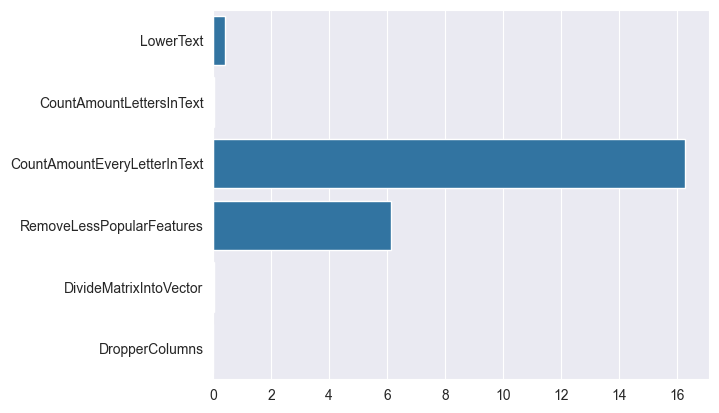

In [6]:
sns.barplot(y=entities_data.spend_time_for_transform_dic.keys(), x=entities_data.spend_time_for_transform_dic.values());

In [6]:
X.corrwith(y).sort_values()

h    -0.430479
     -0.332159
’    -0.258810
1    -0.256627
w    -0.247084
9    -0.244908
4    -0.230716
3    -0.227365
b    -0.197031
6    -0.191300
7    -0.188770
8    -0.185661
y    -0.182962
5    -0.177919
0    -0.176761
)    -0.175596
(    -0.174833
2    -0.171271
"    -0.130935
j    -0.126623
t    -0.080251
o    -0.057938
k    -0.037848
:    -0.023281
m    -0.005296
z     0.001997
.     0.002095
d     0.016158
?     0.017264
e     0.036106
u     0.046064
f     0.059076
q     0.064331
g     0.077040
a     0.086799
x     0.121791
'     0.128278
s     0.128340
p     0.137512
l     0.150074
v     0.157066
r     0.173863
-     0.200137
\n    0.226085
i     0.238515
n     0.238887
c     0.260225
,     0.284135
dtype: float64

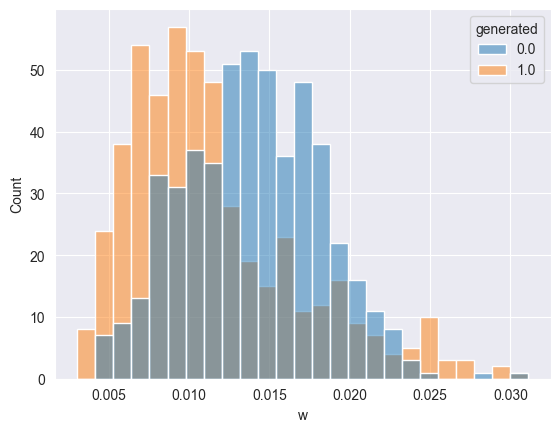

In [7]:
sns.histplot(x=X['w'], hue=y, bins=25);

['pipeline.joblib']

In [10]:
display(pipe)
joblib.dump(pipe, 'pipeline.joblib')

result_df = pd.concat([X, y], axis=1)
display(result_df)

result_df.to_csv('./data_output/df_after_feature_engineering.csv')

Pipeline(steps=[('lower_text',
                 LowerText(_column_out='lower_text', _column_text='text')),
                ('count_amount_letters',
                 CountAmountLettersInText(_column_out='n_letters',
                                          _column_text='lower_text')),
                ('count_every_letter',
                 CountAmountEveryLetterInText(_column_text='lower_text',
                                              _columns_out={'\n', '\r', ' ',
                                                            '!', '"', '#', '$',
                                                            '%', '&', "'", '(',
                                                            ')', '*', '+', ',',
                                                            '-', '.', '/...
                                                                                  ')',
                                                                                  'g',
                                                                                  '’',
                                                                                  '1',
                                                                                  '(',
                                                                                  '6',
                                                                                  '.',
                                                                                  'c',
                                                                                  ' ',
                                                                                  'e',
                                                                                  'n',
                                                                                  'b',
                                                                                  'a',
                                                                                  ',',
                                                                                  'o',
                                                                                  'p',
                                                                                  'x', ...),
                                        _DivideMatrixIntoVector__columns_out=('4',
                                                                              '9',
                                                                              'w',
                                                                              '?',
                                                                              'k',
                                                                              'y',
                                                                              '\n',
                                                                              'f',
                                                                              'u',
                                                                              '3',
                                                                              '"',
                                                                              'i',
                                                                              'h',
                                                                              ')',
                                                                              'g',
                                                                              '’',
                                                                              '1',
                                                                              '(',
                                                                              '6',
                                                                              '.',
                                                               

,w,?,y,"""",q,5,',0,9,u,...,e,n,7,8,l,d,z,:,r,generated
5212,0.009510,0.000352,0.011765,0.00000,0.000916,0.000282,0.000000,0.000282,0.000352,0.018598,...,0.105882,0.056851,0.000211,0.000423,0.029306,0.026488,0.000564,0.000211,0.048679,0.0
6178,0.010323,0.000169,0.010154,0.00000,0.001185,0.000000,0.000000,0.000169,0.000000,0.023016,...,0.095278,0.051616,0.000000,0.000000,0.037739,0.024370,0.000000,0.000338,0.049924,0.0
6355,0.007865,0.000140,0.014466,0.00000,0.001264,0.000000,0.003511,0.000281,0.000000,0.023736,...,0.092978,0.062781,0.000000,0.000000,0.028933,0.029635,0.001404,0.000140,0.045084,0.0
2703,0.010931,0.000000,0.011741,0.00081,0.000405,0.000000,0.000405,0.000000,0.000000,0.019433,...,0.095547,0.065587,0.000000,0.000000,0.042105,0.038057,0.000810,0.000000,0.055061,1.0
21705,0.010435,0.000000,0.013314,0.00000,0.001080,0.000000,0.000360,0.000000,0.000000,0.048219,...,0.120907,0.053616,0.000000,0.000000,0.037783,0.042461,0.000000,0.000000,0.051098,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10978,0.018643,0.000000,0.017769,0.00000,0.000291,0.000000,0.000000,0.000000,0.000000,0.017769,...,0.111273,0.056510,0.000000,0.000000,0.037285,0.028546,0.000000,0.000291,0.045733,0.0
8060,0.016574,0.000000,0.019449,0.00000,0.000338,0.000000,0.000000,0.000000,0.000000,0.025537,...,0.105192,0.051243,0.000000,0.000000,0.040419,0.026383,0.000169,0.000000,0.038390,0.0
25456,0.020343,0.001071,0.021413,0.00000,0.000000,0.000000,0.015525,0.000000,0.000000,0.035867,...,0.073340,0.052998,0.000000,0.000535,0.029443,0.026767,0.000535,0.000000,0.039615,1.0
9862,0.016484,0.001648,0.030769,0.00000,0.001099,0.000549,0.000000,0.000000,0.000000,0.034066,...,0.096703,0.054945,0.000000,0.000000,0.031868,0.021978,0.000000,0.000549,0.055495,0.0


In [ ]:


#metaclass=Final,

In [25]:
#_ = joblib.load('pipeline.joblib')

In [28]:
#_.transform(df_sam)

In [1]:
from ai_essay_prediction_misha.pipeline import names




In [3]:
names.Columns.TEXT = 2

FrozenInstanceError: cannot assign to field 'TEXT'

In [4]:
_ = names._Columns(3)

In [5]:
_.test

3

In [8]:
_.test = 2

FrozenInstanceError: cannot assign to field 'test'